# Import necessary libraries

In [2]:
# Used for data manipulation and analysis.
import pandas as pd 
import numpy as np 
# Used for data visualization.
import seaborn as sns 
import matplotlib.pyplot as plt
# Used for handling missing values.
from sklearn.impute import SimpleImputer 
# Used for feature scaling.
from sklearn.preprocessing import StandardScaler
import logging
# Initializes the logger to log information at the INFO level, which includes timestamps, log level, and log messages.
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# understanding the dataset 

Load data

In [3]:

def load_data(train_path, test_path, store_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    store = pd.read_csv(store_path)
    return train, test, store

# Load the data
train, test, store = load_data('../data/train.csv', '../data/test.csv', '../data/store.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
display(train.head())

print("Test Dataset:")
display(test.head())

print("Store Dataset:")
display(store.head())


Train Dataset:


C:\Users\akili\AppData\Local\Temp\ipykernel_21524\2637730166.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Test Dataset:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Store Dataset:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Function to count rows and columns

In [84]:

def count_rows_columns(df, name):
    rows, columns = df.shape
    print(f"The {name} dataset has {rows} rows and {columns} columns.")
# Count rows and columns for each dataset
count_rows_columns(train, "train")
count_rows_columns(test, "test")
count_rows_columns(store, "store")

The train dataset has 1017209 rows and 9 columns.
The test dataset has 41088 rows and 8 columns.
The store dataset has 1115 rows and 10 columns.


# Function to display data info

In [85]:

def show_data_info(df, name):
    print(f"Information for {name} dataset:")
    df_info = df.info()
    print(df_info)
    print("\n")

In [86]:
# Show data info for each dataset
show_data_info(train, "train")


Information for train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None




In [88]:
show_data_info(test, "test")


Information for test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
None




In [89]:
show_data_info(store, "store")

Information for store dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None





# Function to display data description

In [90]:
# Function to display data description
def describe_data(df, name):
    print(f"Description for {name} dataset:")
    description = df.describe(include='all').transpose()
    print(description)
    print("\n")

In [91]:
# Describe data for each dataset
describe_data(train, "train")


Description for train dataset:
                   count unique         top    freq         mean          std  \
Store          1017209.0    NaN         NaN     NaN   558.429727   321.908651   
DayOfWeek      1017209.0    NaN         NaN     NaN     3.998341     1.997391   
Date             1017209    942  2015-07-31    1115          NaN          NaN   
Sales          1017209.0    NaN         NaN     NaN  5773.818972  3849.926175   
Customers      1017209.0    NaN         NaN     NaN   633.145946   464.411734   
Open           1017209.0    NaN         NaN     NaN     0.830107     0.375539   
Promo          1017209.0    NaN         NaN     NaN     0.381515     0.485759   
StateHoliday     1017209      5           0  855087          NaN          NaN   
SchoolHoliday  1017209.0    NaN         NaN     NaN     0.178647     0.383056   

               min     25%     50%     75%      max  
Store          1.0   280.0   558.0   838.0   1115.0  
DayOfWeek      1.0     2.0     4.0     6.0      7.

In [92]:
describe_data(test, "test")


Description for test dataset:
                 count unique         top   freq        mean           std  \
Id             41088.0    NaN         NaN    NaN     20544.5  11861.228267   
Store          41088.0    NaN         NaN    NaN  555.899533    320.274496   
DayOfWeek      41088.0    NaN         NaN    NaN    3.979167      2.015481   
Date             41088     48  2015-09-17    856         NaN           NaN   
Open           41077.0    NaN         NaN    NaN    0.854322      0.352787   
Promo          41088.0    NaN         NaN    NaN    0.395833      0.489035   
StateHoliday     41088      2           0  40908         NaN           NaN   
SchoolHoliday  41088.0    NaN         NaN    NaN    0.443487      0.496802   

               min       25%      50%       75%      max  
Id             1.0  10272.75  20544.5  30816.25  41088.0  
Store          1.0    279.75    553.5    832.25   1115.0  
DayOfWeek      1.0       2.0      4.0       6.0      7.0  
Date           NaN       NaN   

In [93]:
describe_data(store, "store")

Description for store dataset:
                            count unique              top freq         mean  \
Store                      1115.0    NaN              NaN  NaN        558.0   
StoreType                    1115      4                a  602          NaN   
Assortment                   1115      3                a  593          NaN   
CompetitionDistance        1112.0    NaN              NaN  NaN  5404.901079   
CompetitionOpenSinceMonth   761.0    NaN              NaN  NaN     7.224704   
CompetitionOpenSinceYear    761.0    NaN              NaN  NaN  2008.668857   
Promo2                     1115.0    NaN              NaN  NaN     0.512108   
Promo2SinceWeek             571.0    NaN              NaN  NaN    23.595447   
Promo2SinceYear             571.0    NaN              NaN  NaN  2011.763573   
PromoInterval                 571      3  Jan,Apr,Jul,Oct  335          NaN   

                                  std     min     25%     50%     75%      max  
Store             

# Merge data

In [10]:

train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# Display the first few rows of the merged training data
train.head()



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4,2015-07-31,6064,625,1,1,0,1,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-07-31,8314,821,1,1,0,1,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-07-31,13995,1498,1,1,0,1,7,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4,2015-07-31,4822,559,1,1,0,1,7,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [95]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [97]:
train["Sales"].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

In [98]:
train['Date']=pd.to_datetime(train["Date"],format='%Y-%m-%d')

In [13]:
# to change object to date format
train['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(train['Date']).month


In [14]:
def convert_float_to_int(df):
    # Fill NaN values with 0
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0).astype(int)
    df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype(int)
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(0).astype(int)
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype(int)
    return df

# Apply the function to the training data
train = convert_float_to_int(train)

# Display the info of the training data after conversions
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int32         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Month                      1017209 non-null  int32         
 10  StoreType                  1017209 non-null  object        
 11  Assortment                 1017209 no

# Data cleaning:

 Handling missing values

In [120]:

def handle_missing_values(df):
    imputer = SimpleImputer(strategy='median')
    df['CompetitionDistance'] = imputer.fit_transform(df[['CompetitionDistance']]).astype(int)
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
    df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)
    df['PromoInterval'] = df['PromoInterval'].fillna(0)
    return df

# Apply the function to the training data
train = handle_missing_values(train)

# Display the first few rows of the cleaned training data
train.head()


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,7,2008,0,0,0,
1,2015-07-31,2,5,6064,625,1,1,0,1,a,a,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910,7,2015,0,0,0,
4,2015-07-31,6,5,5651,589,1,1,0,1,a,a,310,7,2013,0,0,0,


Detect and handle outliers

Quantiles Calculation:
Q1: The first quartile (25th percentile) of the 'Sales' column. It represents the value below which 25% of the data fall.
Q3: The third quartile (75th percentile) of the 'Sales' column. It represents the value below which 75% of the data fall.
IQR Calculation: The Interquartile Range (IQR) is calculated as Q3 - Q1. The IQR measures the statistical dispersion and is the range within which the central 50% of the values fall.

Outlier Filtering:
The code filters out rows where the 'Sales' values are considered outliers.
The condition for an outlier in this context is defined as any 'Sales' value less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR.
df[(df['Sales'] >= (Q1 - 1.5 * IQR)) & (df['Sales'] <= (Q3 + 1.5 * IQR))]: This line keeps only the rows where the 'Sales' values are within the range from Q1 - 1.5 * IQR to Q3 + 1.5 * IQR.
Return the Cleaned DataFrame: The function returns the DataFrame with outliers removed.

In [121]:
# Set the Date column as the index before handling outliers
train.set_index('Date', inplace=True)

def handle_outliers(df):
    # Example: Removing outliers in sales using IQR method
    Q1 = df['Sales'].quantile(0.25)
    Q3 = df['Sales'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['Sales'] >= (Q1 - 1.5 * IQR)) & (df['Sales'] <= (Q3 + 1.5 * IQR))]
    return df

# Apply the function to the training data
train = handle_outliers(train)


# Reset the index without affecting the Date column
train.reset_index(inplace=True)

# Display the first few rows of the training data after handling outliers
train.head()



,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,7,2008,0,0,0,
1,2015-07-31,2,5,6064,625,1,1,0,1,a,a,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910,7,2015,0,0,0,
4,2015-07-31,6,5,5651,589,1,1,0,1,a,a,310,7,2013,0,0,0,


In [118]:
train.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [122]:
#changed dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986342 entries, 0 to 986341
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       986342 non-null  datetime64[ns]
 1   Store                      986342 non-null  int64         
 2   DayOfWeek                  986342 non-null  int64         
 3   Sales                      986342 non-null  int64         
 4   Customers                  986342 non-null  int64         
 5   Open                       986342 non-null  int64         
 6   Promo                      986342 non-null  int64         
 7   StateHoliday               986342 non-null  object        
 8   SchoolHoliday              986342 non-null  int64         
 9   StoreType                  986342 non-null  object        
 10  Assortment                 986342 non-null  object        
 11  CompetitionDistance        986342 non-null  int32   

# Exploratory Data Analysis: visualization

 the categorical variables against the sales 

2024-05-28 22:00:38,853 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:00:39,224 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


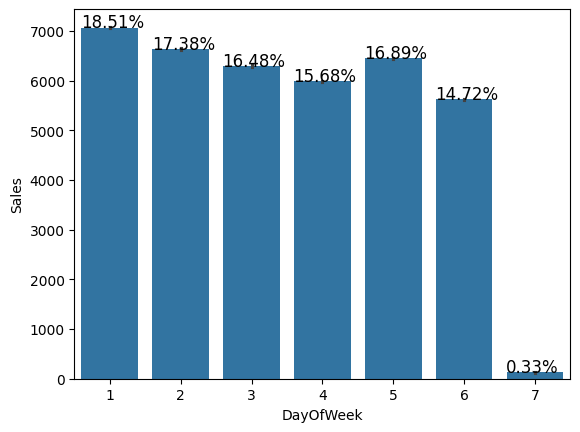

2024-05-28 22:00:53,148 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:00:53,610 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


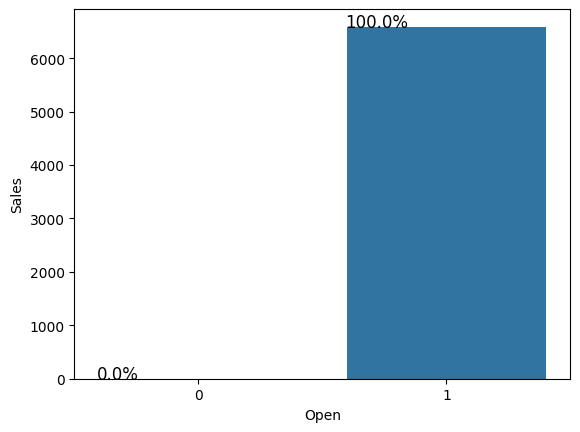

2024-05-28 22:01:12,721 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:01:13,177 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


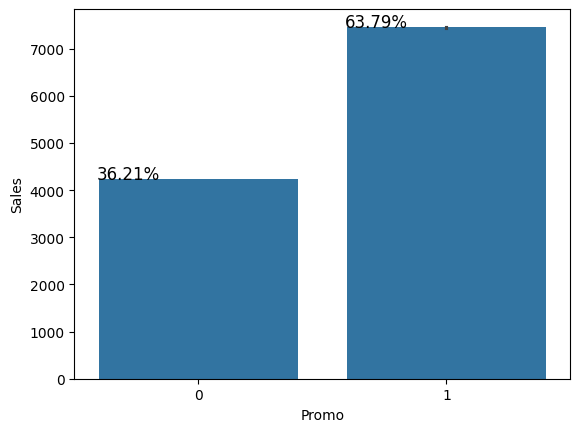

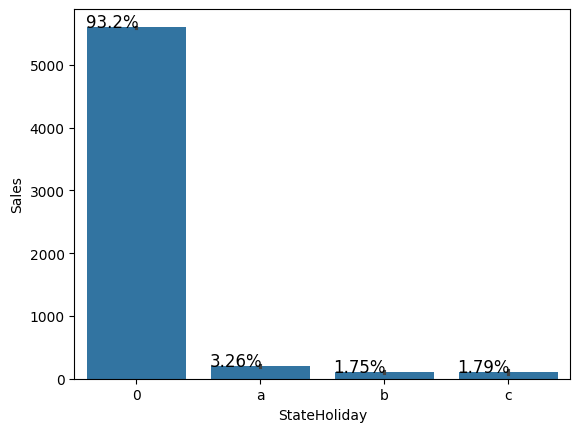

2024-05-28 22:01:54,849 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:01:55,356 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


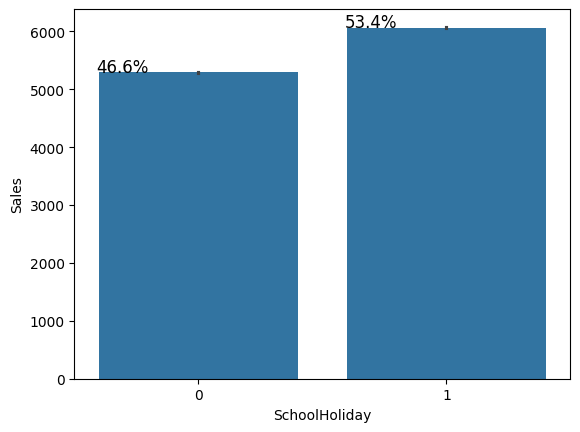

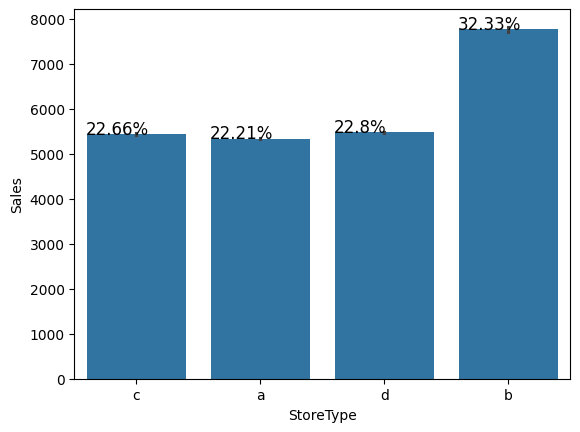

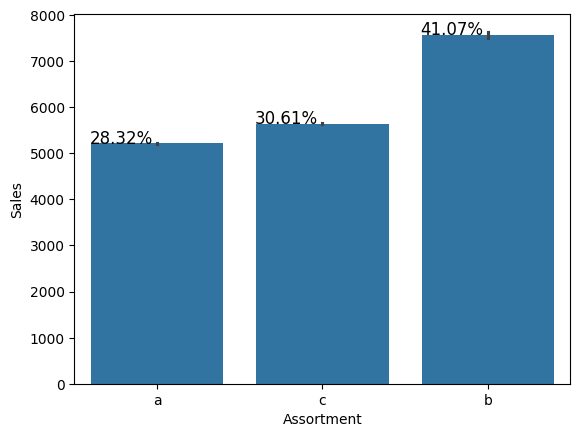

2024-05-28 22:02:55,838 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:02:56,754 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


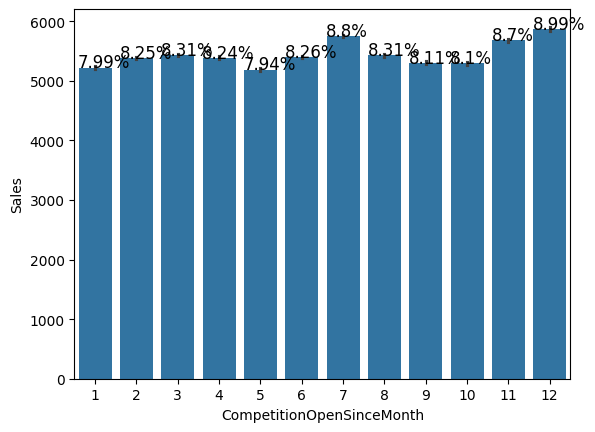

2024-05-28 22:03:06,920 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:03:07,432 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


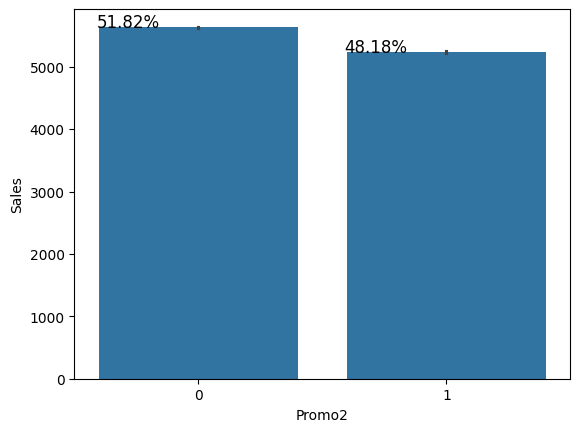

2024-05-28 22:03:28,540 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:03:29,152 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


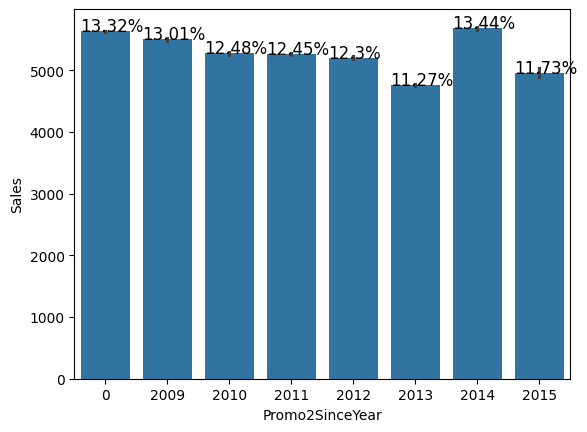

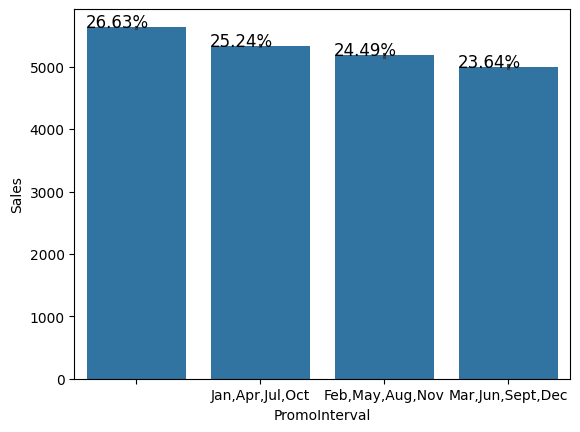

In [123]:
def catagorical_variables(df):
    catagorical_variables=['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
    for value in catagorical_variables:
        ax=sns.barplot(x=df[value], y=df['Sales'])
        totals=[]
        for i in ax.patches:
            totals.append(i.get_height()) # append height for each patch
            
        total=sum(totals) # sum of each patch height for a plot
        for i in ax.patches:
            ax.text(i.get_x() - .01, i.get_height() + .5, \
                    str(round((i.get_height()/total)*100,2))+'%',fontsize=12)
        plt.show()
catagorical_variables(train) 

open and storetype realtionship

2024-05-29 09:53:48,330 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-29 09:53:49,146 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


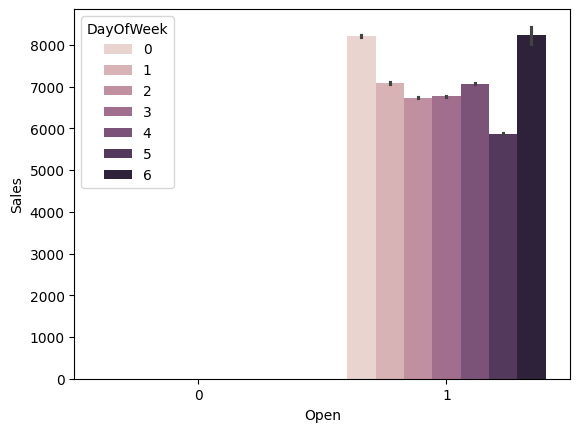

In [6]:
# this indicates open suggestss that whether the store was open or closed for refurbishment and weekends or holidays
def open_storetype(df):
    sns.barplot(x=df["Open"], y=df["Sales"],hue=df["DayOfWeek"])
    
open_storetype(train)

how competition impacts sales and what is the trend in sales over the year as the number of stores and competition increases

2024-05-28 22:18:26,323 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:18:26,846 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


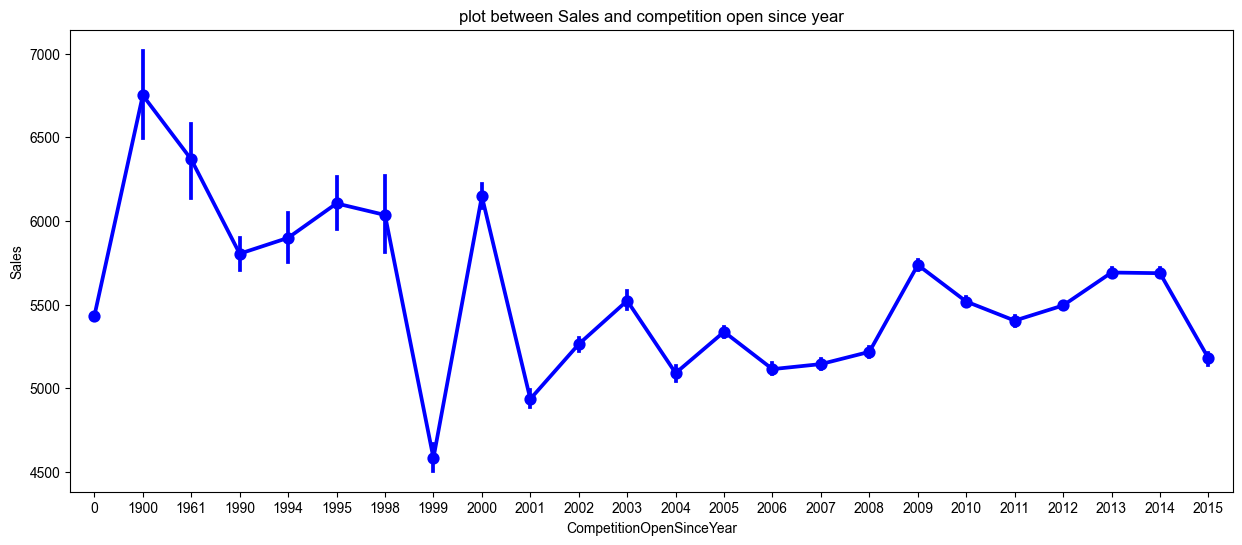

In [125]:
def  competition_impact(df):
    plt.figure(figsize=(15,6))
    sns.pointplot(x='CompetitionOpenSinceYear',y='Sales',data=df,color='blue')
    sns.set_style("dark")
    plt.title("plot between Sales and competition open since year")
competition_impact(train)

competition over CompetitionOpenSincemonth

2024-05-28 22:22:42,334 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 22:22:42,837 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


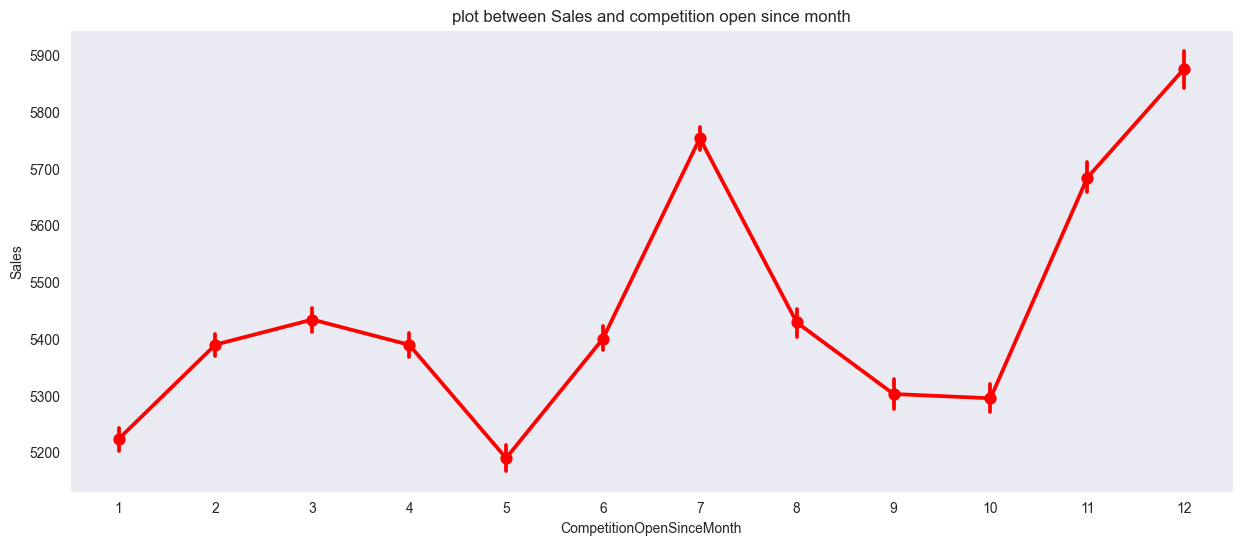

In [126]:
def  competition_impact1(df):
    plt.figure(figsize=(15,6))
    sns.pointplot(x='CompetitionOpenSinceMonth',y='Sales',data=df,color='red')
    sns.set_style("dark")
    plt.title("plot between Sales and competition open since month")
competition_impact1(train)

storetype and its influence on sales

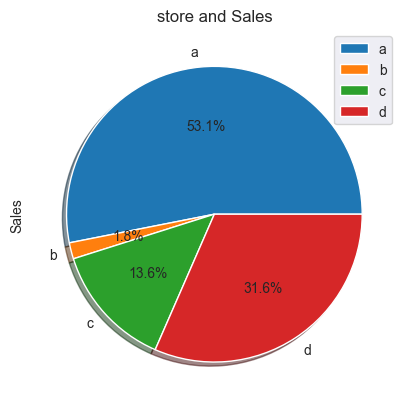

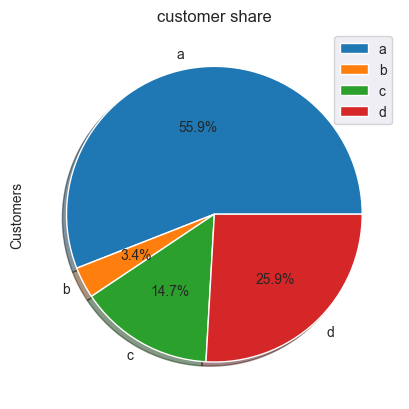

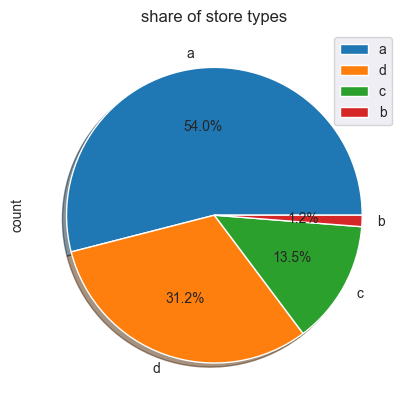

In [129]:
def storetype_impact(df):
    df.groupby('StoreType')['Sales'].sum().plot.pie(title='store and Sales',legend=True,autopct='%1.1f%%', shadow=True)
    plt.show()
    
    #customer and store type
    df.groupby('StoreType')['Customers'].sum().plot.pie(title='customer share',legend=True,autopct='%1.1f%%', shadow=True)
    plt.show()
    
    # store types in all the dataset
    df['StoreType'].value_counts().plot.pie(title='share of store types',legend=True,autopct='%1.1f%%', shadow=True)
    plt.show()
storetype_impact(train)

finding sale value for store type

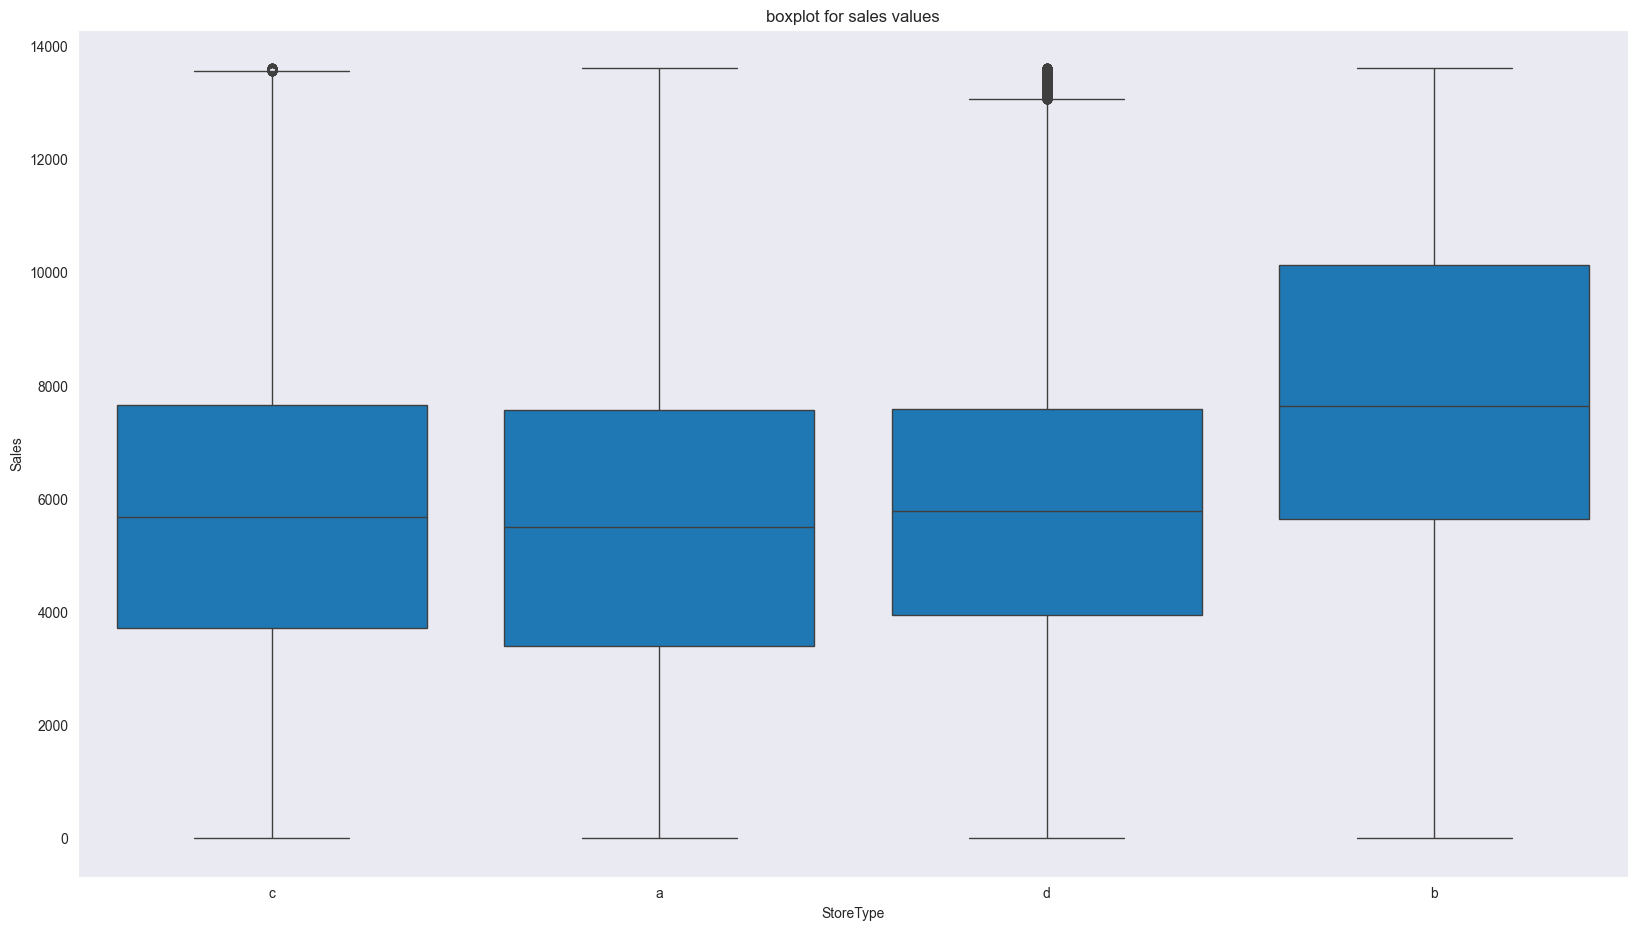

In [131]:
def sales_value_in_store_type(df):
    plt.figure(figsize=(20,11))
    plot_store_type_sales=sns.boxplot(x="StoreType",y='Sales',data=df,saturation=1.5,width=0.8)
    plt.title("boxplot for sales values")
sales_value_in_store_type(train) 

the realtionship between store opening status and sales during school holidays and state holidays in the rossmann sales

2024-05-28 22:56:42,816 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\akili\AppData\Local\Temp\ipykernel_22916\3955638822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales=sns.barplot(x="SchoolHoliday",y="Sales",data=df,palette='viridis')
2024-05-28 22:56:43,395 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


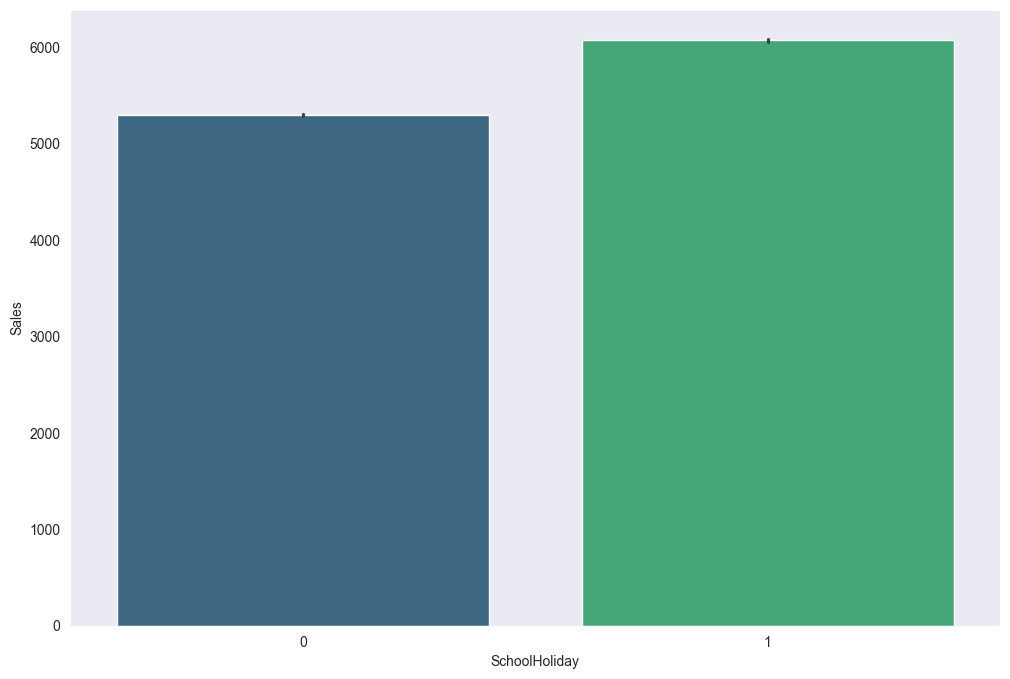

In [133]:
def  storeopening_sale_holidays(df):
    plt.figure(figsize=(12,8))
    
    stateholiday_sales=sns.barplot(x="SchoolHoliday",y="Sales",data=df,palette='viridis')

storeopening_sale_holidays(train)
#StateHoliday        
 

count store's daily promo

2024-05-28 23:01:52,555 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-28 23:01:53,083 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


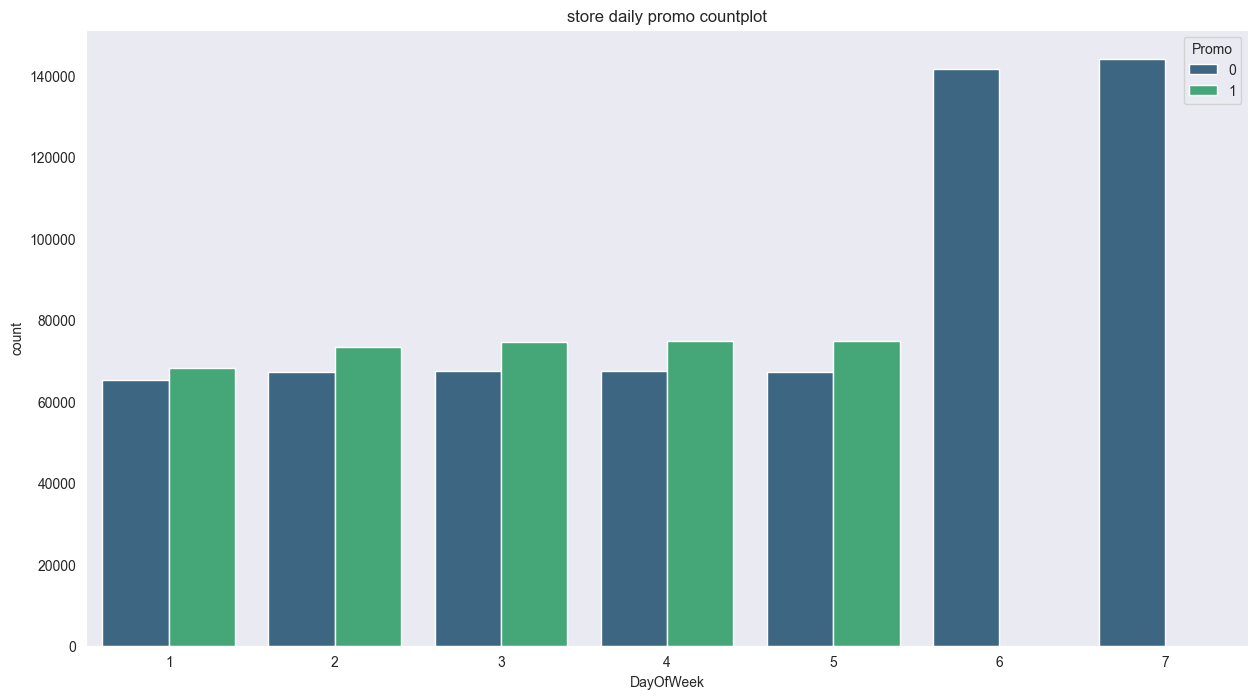

In [134]:
def store_daily_promo(df):
    plt.figure(figsize=(15,8))
    
    sns.countplot(x="DayOfWeek",hue="Promo",data=df,palette='viridis')
    plt.title("store daily promo countplot")

store_daily_promo(train)

C:\Users\akili\AppData\Local\Temp\ipykernel_22916\4293841740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stateholiday_sales=sns.barplot(x="StateHoliday",y="Sales",data=df,palette='viridis')


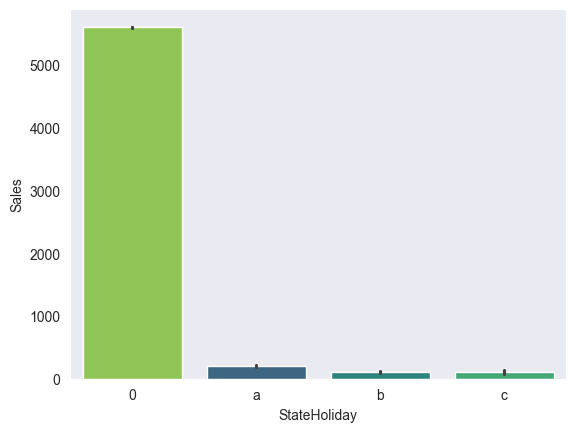

In [137]:
def stateholiday_sales(df):
    stateholiday_sales=sns.barplot(x="StateHoliday",y="Sales",data=df,palette='viridis')
stateholiday_sales(train) 

Compare promotion distribution

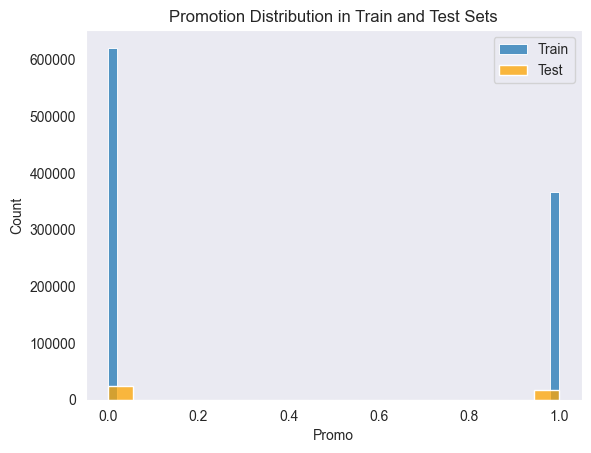

In [138]:

def compare_promo_distribution(train, test):
    sns.histplot(train['Promo'], kde=False, label='Train')
    sns.histplot(test['Promo'], kde=False, color='orange', label='Test')
    plt.legend()
    plt.title('Promotion Distribution in Train and Test Sets')
    plt.show()


compare_promo_distribution(train, test)


Analyze sales during holidays

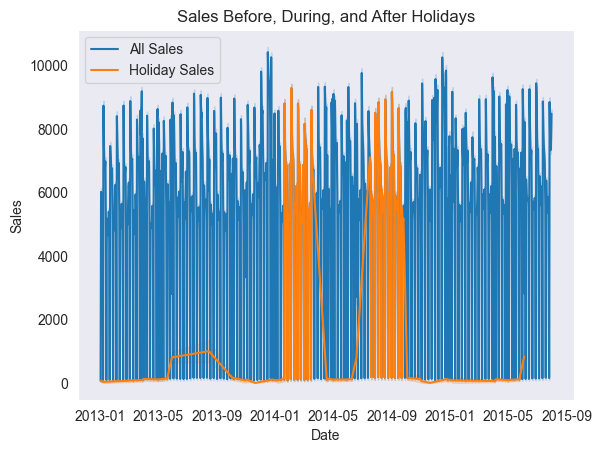

In [139]:
# Sales behavior before, during, and after holidays
def sales_during_holidays(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    holidays = df[df['StateHoliday'] != '0']
    sns.lineplot(data=df, x='Date', y='Sales', label='All Sales')
    sns.lineplot(data=holidays, x='Date', y='Sales', label='Holiday Sales')
    plt.title('Sales Before, During, and After Holidays')
    plt.show()


sales_during_holidays(train)


Seasonal Purchase Behavior

2024-05-29 09:34:48,233 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-29 09:34:49,019 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


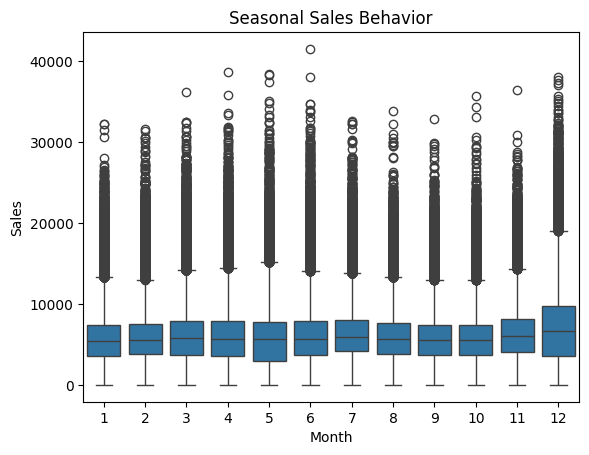

In [4]:
# Seasonal Purchase Behavior
def seasonal_sales_behavior(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    sns.boxplot(x='Month', y='Sales', data=df)
    plt.title('Seasonal Sales Behavior')
    plt.show()

# Analyze seasonal sales behavior
seasonal_sales_behavior(train)


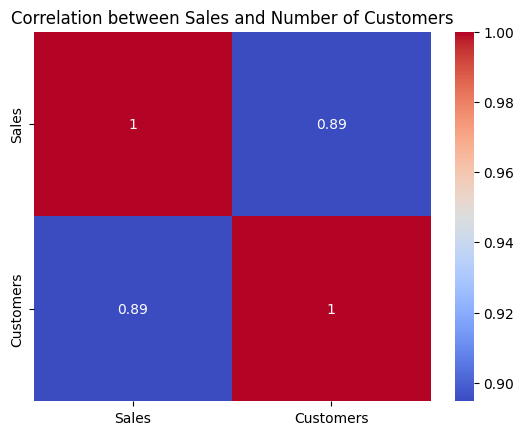

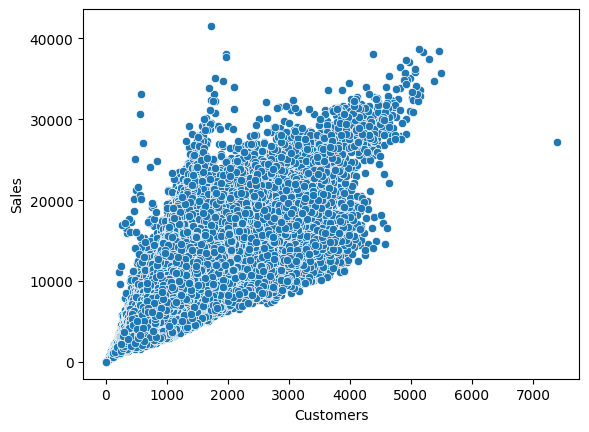

In [7]:
# Correlation Analysis
def correlation_analysis(df):
    correlation = df[['Sales', 'Customers']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation between Sales and Number of Customers')
    plt.show()
    sns.scatterplot(x=df['Customers'],y=df['Sales'])

# Perform correlation analysis
correlation_analysis(train)


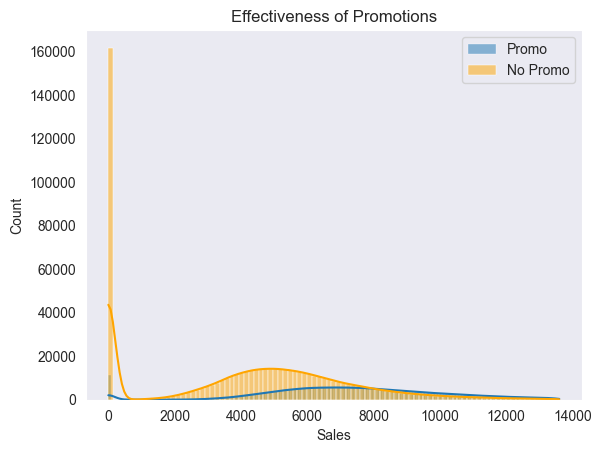

In [145]:
# Promo Effectiveness
def promo_effectiveness(df):
    promo_sales = df[df['Promo'] == 1]['Sales']
    no_promo_sales = df[df['Promo'] == 0]['Sales']
    sns.histplot(promo_sales, kde=True, label='Promo')
    sns.histplot(no_promo_sales, kde=True, color='orange', label='No Promo')
    plt.legend()
    plt.title('Effectiveness of Promotions')
    plt.show()

# Analyze promo effectiveness
promo_effectiveness(train)


Operational Trends by dayof week

2024-05-29 09:42:19,195 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-29 09:42:19,659 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


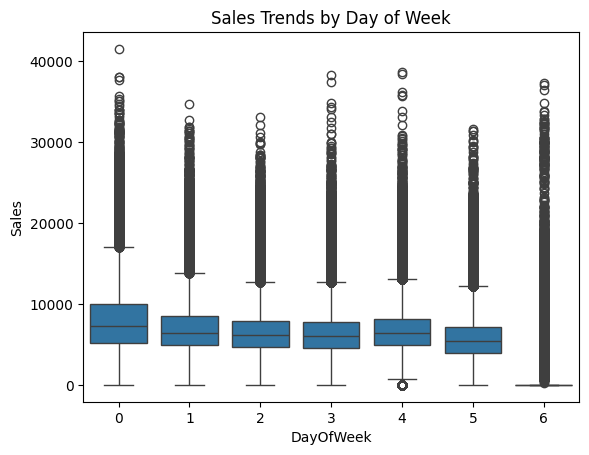

In [5]:

# Operational Trends
def operational_trends(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    sns.boxplot(x='DayOfWeek', y='Sales', data=df)
    plt.title('Sales Trends by Day of Week')
    plt.show()

# Analyze operational trends
operational_trends(train)

Assortment and Competition Analysis

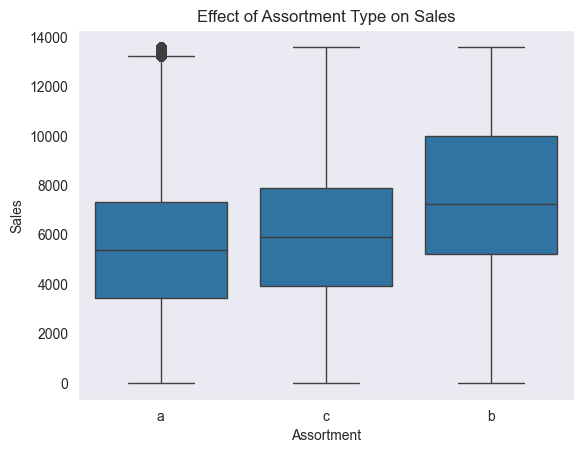

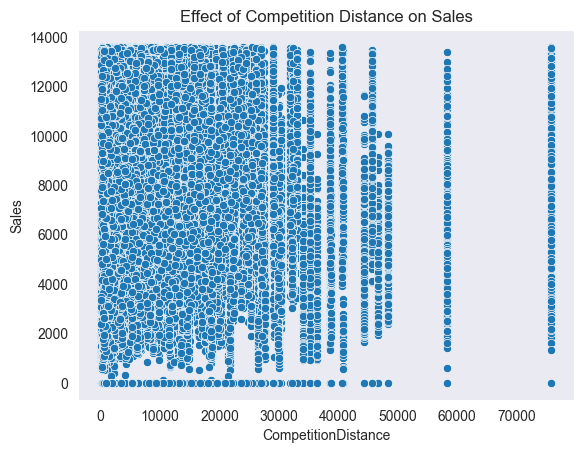

In [147]:
# Assortment and Competition Analysis
def assortment_effect(df):
    sns.boxplot(x='Assortment', y='Sales', data=df)
    plt.title('Effect of Assortment Type on Sales')
    plt.show()

def competition_effect(df):
    sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
    plt.title('Effect of Competition Distance on Sales')
    plt.show()

# Analyze assortment effect
assortment_effect(train)

# Analyze competition effect
competition_effect(train)


how did the temporary closure of the store due to refuribishment affect the over all sales of the companyand what evidence can be seen in the sales over the year plot?

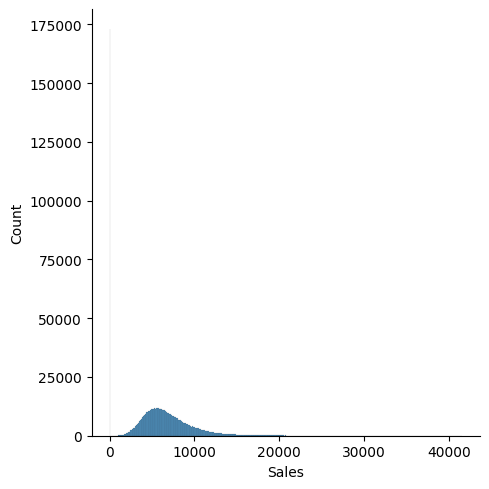

In [8]:
#distrubution of sales of the company
def distribution_of_sales(df):
    sns.displot(x=df['Sales'])
distribution_of_sales(train)

correlation between different features in the  rossman sales prediction dataset affect the sales target variable?

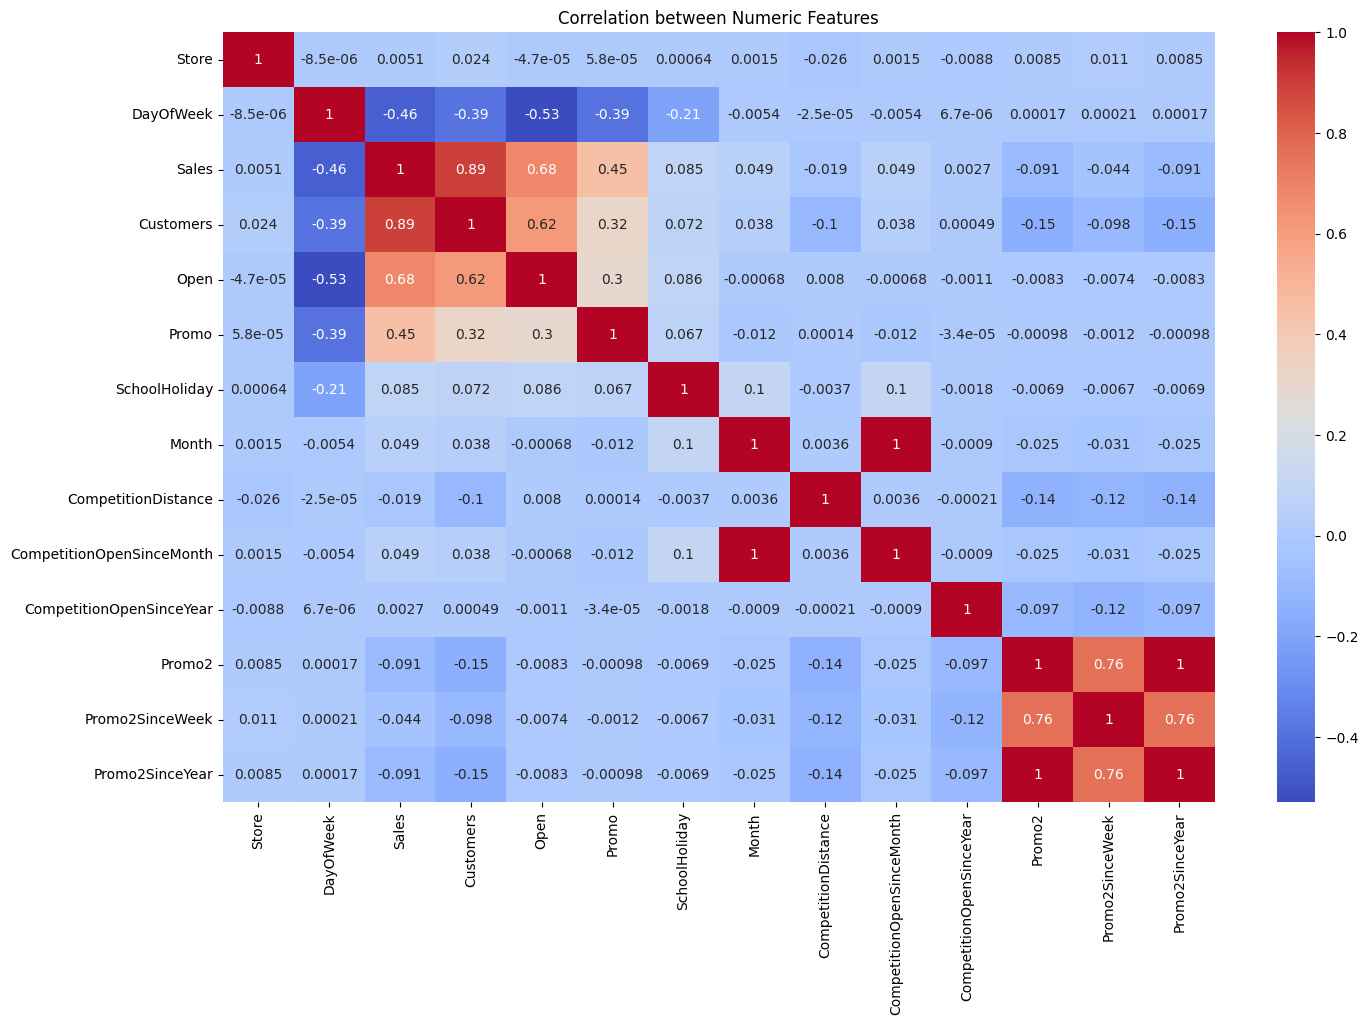

In [16]:
def correlation_analysis(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(16,10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
    plt.title('Correlation between Numeric Features')
    plt.show()

# Apply the function to the training data
correlation_analysis(train)
